<b>ML_GROUP059 | Assignment 2 | ML_GROUP059_A2_Neural_Network </b>
----------------------------------------
### Skin Segmentation
<br><b>Description:</b> The Skin Segmentation dataset is constructed over B, G, R color space. 
<br>Skin and Nonskin dataset is generated using skin textures from face images of diversity of age, gender, and race people.
<br>Objective is determination of whether Skin Or Non-Skin from the color pixels using Neural Network.

<b>Feature Description</b><br>

Data Set Characteristics:  Univariate

Number of Instances:       245057

Number of Attributes:      4

Associated Tasks:          Classification


##### Independent Features:
---
Column 1		-  Numeric         -	Represent Blue pixel value	<br>
Column 2		-  Numeric         -	Represent Green pixel value<br>
Column 3		-  Numeric         -	Represent Red pixel value<br>
    
##### Target Variable:
------
Column 4   -  Numeric     -	Classification<br>

In [1]:
# Importing required libraries
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
#lets check the current working directory
from os import chdir, getcwd
wd=getcwd()
wd
chdir(wd)
wd

'/Users/pkoduri/PK_Data/Trainings/BITS_Mtech/Sem2/Assignments/ML_Asg/A2'

 <b>Importing</b> data from the provided data file.<br>

In [3]:
#Reading the dataset given in the text format and generating a csv out of it

with open('Skin_NonSkin.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split("\t") for line in stripped if line)
    with open('Skin_NonSkin.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        #writer.writerow(('Red', 'Blue','Green','Class'))
        writer.writerows(lines)

In [4]:
# Create a dataframe out of the csv generated
# Use this dataframe going further.

dataset = loadtxt('Skin_NonSkin.csv', delimiter=',')
data=pd.DataFrame(data=dataset)
data.rename(columns={0: 'Blue', 1: 'Green', 2: 'Red', 3: 'Class'}, inplace=True)

#### Reviewing Data

In [5]:
# Check data for any null values - Description file claims there are no null values - confirming
data.isnull().sum() 

Blue     0
Green    0
Red      0
Class    0
dtype: int64

In [6]:
# Trying to describe the data and see various attributes

print("Reviewing data......",data.head())

print("\n\n\nShape of data...",data.shape)

print("\n\n\nDescribing different numeric attributes...",data.describe().T)

print("\n\n\nUnderstanding different attributes types...\n\n")
print(data.info())

Reviewing data......    Blue  Green    Red  Class
0  74.0   85.0  123.0    1.0
1  73.0   84.0  122.0    1.0
2  72.0   83.0  121.0    1.0
3  70.0   81.0  119.0    1.0
4  70.0   81.0  119.0    1.0



Shape of data... (245057, 4)



Describing different numeric attributes...           count        mean        std  min   25%    50%    75%    max
Blue   245057.0  125.065446  62.255653  0.0  68.0  139.0  176.0  255.0
Green  245057.0  132.507327  59.941197  0.0  87.0  153.0  177.0  255.0
Red    245057.0  123.177151  72.562165  0.0  70.0  128.0  164.0  255.0
Class  245057.0    1.792461   0.405546  1.0   2.0    2.0    2.0    2.0



Understanding different attributes types...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
Blue     245057 non-null float64
Green    245057 non-null float64
Red      245057 non-null float64
Class    245057 non-null float64
dtypes: float64(4)
memory usage: 7.5 MB
None


In [7]:
data.describe()

,Blue,Green,Red,Class
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


#### Note:
    
    No missing values - so null value handling not required
    No categorical variable - so not required to handle them

#### EDA - Data Visualization 
Data Distrubution (Feature wise spread) to get an insight about different features and their distribution

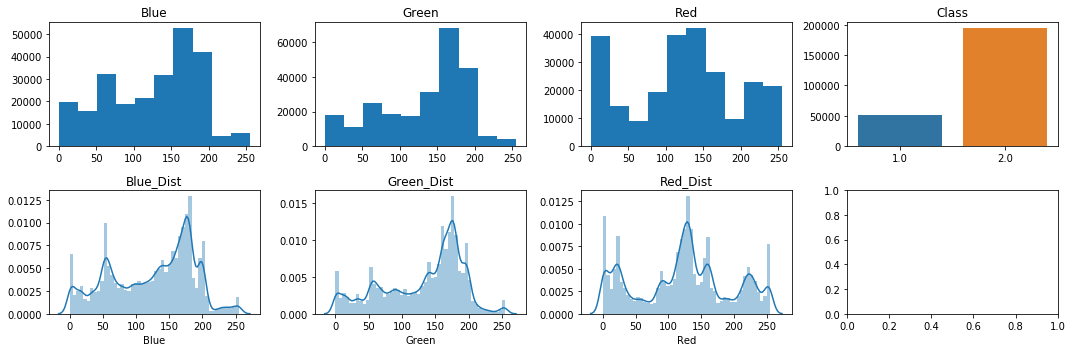

In [8]:
"""Plotting all the attributes to get a visualization of the 
   intra-column Data distribution / Target variable distribution
"""
#data.columns[1:]
graphRow, graphCol = 0, 0
catch,dims = plt.subplots(2, 4, figsize = (15, 5))
plt.subplots_adjust(hspace = .4)

for att in list(data.columns[0:])+['Blue_Dist','Green_Dist','Red_Dist']:            
    if att in ['Blue','Green','Red']:
       dims[graphRow,graphCol].hist(data[att].dropna())
       dims[graphRow, graphCol].set_title(att)

                
    if att in ['Class']:
        bar_data = data[att].value_counts()
        sb.barplot(bar_data.index, bar_data.values, ax = dims[graphRow,graphCol])
    
    if att in ['Blue_Dist']:
        plt.tight_layout()
        sb.distplot(data['Blue'],ax = dims[graphRow,graphCol])
    
    if att in ['Green_Dist']:
        plt.tight_layout()
        sb.distplot(data['Green'],ax = dims[graphRow,graphCol])

    if att in ['Red_Dist']:
        plt.tight_layout()
        sb.distplot(data['Red'],ax = dims[graphRow,graphCol])
        
    dims[graphRow, graphCol].set_title(att)    
    graphCol += 1 
    if graphCol ==4:
        graphRow += 1
        graphCol = 0

#### Inference:
     More records correspond to class 1.
     Red pixel values span between 0 and 250 with majority around [0-50],[100-150] and [200-250]
     Blue pixel values span between 0 and 250 with majority around [150-200]
     Green pixel values span between 0 and 250 with majority around [150-200]

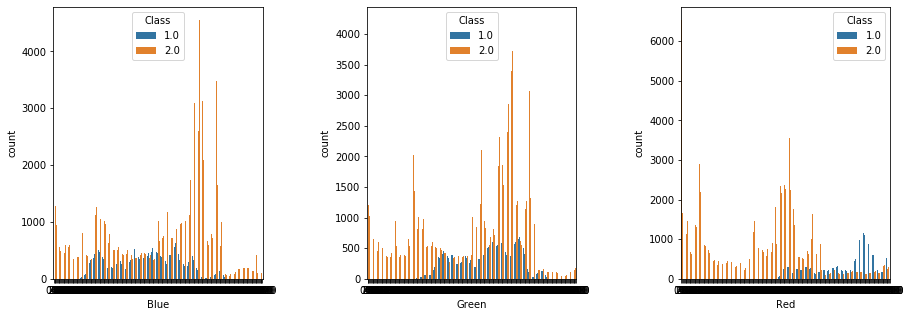

In [9]:
f, axes = plt.subplots(1, 3,figsize = (15, 5))
plt.subplots_adjust(wspace = .50)

sb.countplot(x='Blue',hue="Class",data=data,orient='v' , ax=axes[0])
sb.countplot(x='Green',hue="Class",data=data,orient='v' , ax=axes[1])
sb.countplot(x='Red',hue="Class",data=data,orient='v' , ax=axes[2])

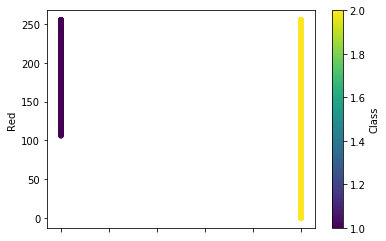

In [10]:
ax2 = data.plot.scatter(x='Class',
                      y='Red',
                      c='Class',
                      colormap='viridis')

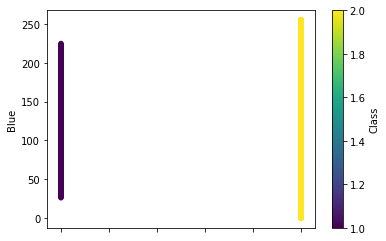

In [11]:
ax2 = data.plot.scatter(x='Class',
                      y='Blue',
                      c='Class',
                      colormap='viridis')

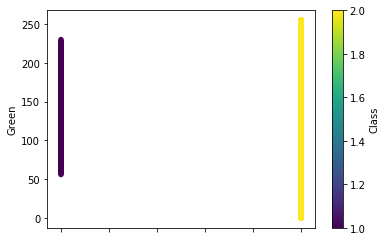

In [12]:
ax2 = data.plot.scatter(x='Class',
                      y='Green',
                      c='Class',
                      colormap='viridis')

##### Inference:
     Larger Blue value higher chance that the record belongs to class 2
     Smaller Red value higher chance that the record belongs to class 2
     Average green value higher chance that the record belongs to class 1

##### Feature Processing / Cleaning - Based on EDA above

In [13]:
# Tagging target variable to 0 or 1
# i.e Either Skin or Non-Skin

data['Class']=[1 if each==1.0 else 0 for each in data['Class']]
#dataTemp = pd.concat([data.head(20000),data.tail(20000)])
dataTemp=data

In [14]:
# Feature Scaling
#Standardize features by removing the mean(=0) and scaling to unit variance
sc = StandardScaler()
x_data = sc.fit_transform(dataTemp.iloc[:,0:3])

In [15]:
y_data = dataTemp.iloc[:,3]

<b>Correlation</b>: Understanding the correlation between different attibutes

In [16]:
dataTemp.corr()

,Blue,Green,Red,Class
Blue,1.000000,0.855250,0.496376,-0.092030
Green,0.855250,1.000000,0.660098,0.120327
Red,0.496376,0.660098,1.000000,0.569958
Class,-0.092030,0.120327,0.569958,1.000000


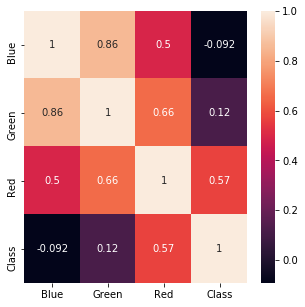

In [17]:
plt.figure(figsize = (5,5))        # Size of the figure

sb.heatmap(dataTemp.corr(),annot = True)

##### Inference:
     Each of the three attributes Red, Green, Blue is contributing to the class
     So let use all of them for training the model.

## Training the model:
### Trail 1:

    i.   Split the data to Train and Test sets<br>
    ii.  Fit the Neural Network model<br>
    iii. Review results on train data<br>
    iv.  Preformance metrics on validation data

In [18]:
# Splitting the data in to train and test for running the model

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=1,test_size=0.25)

#### Defining the Keras model:

##### Definition:
    The model expects rows of data with 3 variables (the input_dim=3 argument)
    The first hidden layer has 4 nodes and uses the relu activation function.
    The second hidden layer has 80 nodes and uses the relu activation function.
    The third hidden layer has 80 nodes and uses the relu activation function.
    The output layer has one node and uses the sigmoid activation function.

##### Model uses,
    Loss Measure:     'binary_crossentropy'
        Optimizer:    'adam' 
        Metrics:      'accuracy'

##### Model Fits,
    With Batch size: 100
        Epochs: 15
        
#### Note:
    Arrive at this metrics after many interations of trail and error with,
        Number of hidden layers
        Number of nodes in each hidden layer
        Activation function in the output layer
        Batch size
        Epochs
     Finally this combination seem to give a resonable accuracy.

In [19]:
model = Sequential()
model.add(Dense(4, input_dim=3, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=15, batch_size=100)


Epoch 1/15
183792/183792 [==============================] - 9s 50us/step - loss: 0.0408 - acc: 0.9856
Epoch 2/15
183792/183792 [==============================] - 6s 32us/step - loss: 0.0096 - acc: 0.9977
Epoch 3/15
183792/183792 [==============================] - 6s 35us/step - loss: 0.0092 - acc: 0.9979
Epoch 4/15
183792/183792 [==============================] - 7s 39us/step - loss: 0.0090 - acc: 0.9980
Epoch 5/15
183792/183792 [==============================] - 7s 36us/step - loss: 0.0089 - acc: 0.9980
Epoch 6/15
183792/183792 [==============================] - 7s 37us/step - loss: 0.0087 - acc: 0.9981
Epoch 7/15
183792/183792 [==============================] - 6s 35us/step - loss: 0.0086 - acc: 0.9981
Epoch 8/15
183792/183792 [==============================] - 7s 36us/step - loss: 0.0085 - acc: 0.9981
Epoch 9/15
183792/183792 [==============================] - 8s 41us/step - loss: 0.0084 - acc: 0.9981
Epoch 10/15
183792/183792 [==============================] - 7s 38us/step - loss:

### Validating the Trained Model:

##### Accuracy

In [22]:
# Find accuracy on the Test data

_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

61265/61265 [==============================] - 2s 30us/step
Accuracy: 99.83


##### Confusion Matrix

In [23]:
# Generate the predictions on the Test data
predictions = model.predict_classes(x_test)
cm=confusion_matrix (y_test,predictions,  labels=None,sample_weight=None, normalize=None)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48454
           1       0.99      1.00      1.00     12811

    accuracy                           1.00     61265
   macro avg       1.00      1.00      1.00     61265
weighted avg       1.00      1.00      1.00     61265



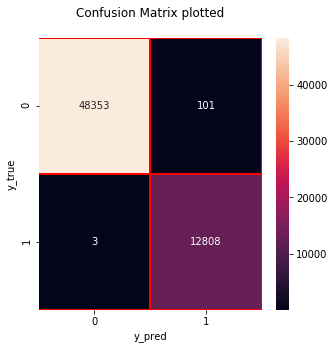

In [24]:
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sb.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
print("Classification Report:\n")
print(classification_report(y_test,predictions))
plt.title("Confusion Matrix plotted\n")
plt.show()

### Trail 2:
    Reviewing the dataset we found many duplicate records.
    Even though duplication is not a concern here, just for our understanding we have
    tried removing duplicates.

    Understanding is that it doesn't improve any performance

In [25]:
data2 = data
data2.drop_duplicates(keep=False,inplace=True)
data2.shape

# Tagging target variable to 0 or 1
# i.e Either Skin or Non-Skin

data2['Class']=[1 if each==1.0 else 0 for each in data2['Class']]
#dataTemp = pd.concat([data.head(20000),data.tail(20000)])
dataTemp2=data2


# Feature Scaling
#Standardize features by removing the mean(=0) and scaling to unit variance
sc = StandardScaler()
x_data = sc.fit_transform(dataTemp2.iloc[:,0:3])


y_data = dataTemp2.iloc[:,3]


# Splitting the data in to train and test for running the model

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=1,test_size=0.25)

model = Sequential()
model.add(Dense(4, input_dim=3, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [26]:
# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=15, batch_size=100)

# Find accuracy on the Test data

_, accuracy = model.evaluate(x_test, y_test)
print('\n\n\nTrail #2 - Removing duplicates - Accuracy: %.2f' % (accuracy*100))

Epoch 1/15
23322/23322 [==============================] - 2s 85us/step - loss: 0.2983 - acc: 0.8590
Epoch 2/15
23322/23322 [==============================] - 1s 31us/step - loss: 0.1573 - acc: 0.9343
Epoch 3/15
23322/23322 [==============================] - 1s 31us/step - loss: 0.0895 - acc: 0.9658
Epoch 4/15
23322/23322 [==============================] - 1s 31us/step - loss: 0.0526 - acc: 0.9829
Epoch 5/15
23322/23322 [==============================] - 1s 31us/step - loss: 0.0363 - acc: 0.9894
Epoch 6/15
23322/23322 [==============================] - 1s 32us/step - loss: 0.0300 - acc: 0.9910
Epoch 7/15
23322/23322 [==============================] - 1s 32us/step - loss: 0.0268 - acc: 0.9918
Epoch 8/15
23322/23322 [==============================] - 1s 32us/step - loss: 0.0250 - acc: 0.9928
Epoch 9/15
23322/23322 [==============================] - 1s 32us/step - loss: 0.0232 - acc: 0.9930
Epoch 10/15
23322/23322 [==============================] - 1s 32us/step - loss: 0.0226 - acc: 0.9931